In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import requests

import gensim
import gensim.corpora as corpora
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel

from pprint import pprint

import spacy

import pickle
import re 
import pyLDAvis
import pyLDAvis.gensim_models

import matplotlib.pyplot as plt 
import pandas as pd

import requests
import json 
from collections import Counter
from nltk.corpus import stopwords    

# npm serve
# username: 330-creative
# password: jQeQD3ktzqzhZJB6
# mongodb+srv://330-creative:<password>@cluster0.ciqs10o.mongodb.net/test
# mongodb+srv://330-creative:<password>@cluster0.ciqs10o.mongodb.net/?retryWrites=true&w=majority
# Replace <password> with the password for the 330-creative user. Ensure any option params are URL encoded.

In [5]:
# https://content.guardianapis.com/search?&api-key=test
apiKey = "58de53b7-a9ef-45d9-bf11-60072288147d"
searchContent = "trump"
link2 = "https://content.guardianapis.com/search?q=&api-key=test"
link =  (f"https://content.guardianapis.com/search?q={searchContent}&api-key={apiKey}")
response_API = requests.get(link)
#response_API = requests.get('https://api.covid19india.org/state_district_wise.json')
print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
# results = parse_json['response']['results']
# count = 0
# for r in results:
#     count += 1
#     id = r['id']
#     print(id)
# print(count)

200


In [18]:
apiKey = "58de53b7-a9ef-45d9-bf11-60072288147d"
newsID = "football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction"
linkGetDetail = f"https://content.guardianapis.com/{newsID}?show-fields=bodyText&api-key={apiKey}"
response_API = requests.get(linkGetDetail)
print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
parse_json["response"]["content"]


200


{'id': 'football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
 'type': 'liveblog',
 'sectionId': 'football',
 'sectionName': 'Football',
 'webPublicationDate': '2022-11-30T23:38:59Z',
 'webTitle': 'Socceroos to face Argentina in World Cup knockouts after Australia’s famous win over Denmark – live reaction',
 'webUrl': 'https://www.theguardian.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
 'apiUrl': 'https://content.guardianapis.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
 'fields': {'bodyText': "What a morning, what a day. How good is Harry Souttar? With that, we will wrap up our live coverage of reaction to the Socceroos historic triumph over Denmark and progression to the knockout stages of the World Cup. Here’s a summary of everything that has happened since the final whistle: Argentina defeated Poland to s

In [19]:
data

'{"response":{"status":"ok","userTier":"developer","total":1,"content":{"id":"football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction","type":"liveblog","sectionId":"football","sectionName":"Football","webPublicationDate":"2022-11-30T23:38:59Z","webTitle":"Socceroos to face Argentina in World Cup knockouts after Australia’s famous win over Denmark – live reaction","webUrl":"https://www.theguardian.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction","apiUrl":"https://content.guardianapis.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction","fields":{"bodyText":"What a morning, what a day. How good is Harry Souttar? With that, we will wrap up our live coverage of reaction to the Socceroos historic triumph over Denmark and progression to the knockout stages of the World Cup. Here’s a summary of everything that has happened since the 

In [7]:
apiKey = "58de53b7-a9ef-45d9-bf11-60072288147d"
newsID = "football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction"
linkGetDetail = (f"https://content.guardianapis.com/{newsID}?show-fields=bodyText&api-key={apiKey}")
response_API = requests.get(linkGetDetail)
print(response_API.status_code)
data = response_API.text
parse_json = json.loads(data)
parse_json

200


{'response': {'status': 'ok',
  'userTier': 'developer',
  'total': 1,
  'content': {'id': 'football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
   'type': 'liveblog',
   'sectionId': 'football',
   'sectionName': 'Football',
   'webPublicationDate': '2022-11-30T23:38:59Z',
   'webTitle': 'Socceroos to face Argentina in World Cup knockouts after Australia’s famous win over Denmark – live reaction',
   'webUrl': 'https://www.theguardian.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
   'apiUrl': 'https://content.guardianapis.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
   'fields': {'bodyText': "What a morning, what a day. How good is Harry Souttar? With that, we will wrap up our live coverage of reaction to the Socceroos historic triumph over Denmark and progression to the knockout stages of the World Cup. Here

In [8]:
parse_json["response"]

{'status': 'ok',
 'userTier': 'developer',
 'total': 1,
 'content': {'id': 'football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
  'type': 'liveblog',
  'sectionId': 'football',
  'sectionName': 'Football',
  'webPublicationDate': '2022-11-30T23:38:59Z',
  'webTitle': 'Socceroos to face Argentina in World Cup knockouts after Australia’s famous win over Denmark – live reaction',
  'webUrl': 'https://www.theguardian.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
  'apiUrl': 'https://content.guardianapis.com/football/live/2022/dec/01/socceroos-reach-world-cup-last-16-with-famous-win-over-denmark-live-reaction',
  'fields': {'bodyText': "What a morning, what a day. How good is Harry Souttar? With that, we will wrap up our live coverage of reaction to the Socceroos historic triumph over Denmark and progression to the knockout stages of the World Cup. Here’s a summary of everythi

In [9]:
response = requests.get('https://example-files.online-convert.com/document/txt/example.txt')
someText = response.text
#someText = someText.values.tolist()
tweets = [t.split(',') for t in someText]
id2word = Dictionary(tweets)
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in tweets]
print(corpus[:1])

# Build LDA model
lda_model = LdaModel(corpus=corpus,
                   id2word=id2word,
                   num_topics=10, 
                   random_state=0,
                   chunksize=100,
                   alpha='auto',
                   per_word_topics=True)

#pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
#coherence_model_lda = CoherenceModel(model=lda_model, texts=tweets, dictionary=id2word, coherence='c_v')
#coherence_lda = coherence_model_lda.get_coherence()

pyLDAvis.enable_notebook()
d = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
#d = gensimvis.prepare(lda_model, corpus, id2word)
pyLDAvis.display(d)
# visualization = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
#visualization


[[(0, 1)]]

Perplexity:  -3.5592368883379764


c:\Users\Willi\miniconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


In [15]:
type(d)

pyLDAvis._prepare.PreparedData

In [10]:
id2word.keys

<bound method Dictionary.keys of <gensim.corpora.dictionary.Dictionary object at 0x0000026E1ACAF5E0>>

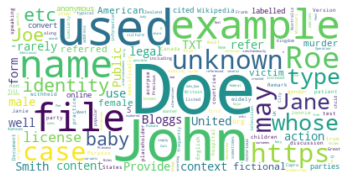

(str, None)

In [11]:
response = requests.get('https://example-files.online-convert.com/document/txt/example.txt')
someText = response.text


def draw_wordcloud(someText):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(someText)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
type(someText), draw_wordcloud(someText)


In [3]:
def get_wordCount(text):
    stop_words = set(stopwords.words('english'))

    for char in '-.,\n':
        text=text.replace(char,' ')
    text = text.lower()
    word_list = text.split()
    word_list = [w for w in word_list if not w in stop_words]
    wordCount = Counter(word_list).most_common()

    result  = []
    for i in wordCount:
        tmp = {'word':i[0], 'count':i[1]}
        result.append(tmp)

    return result
response = requests.get('https://example-files.online-convert.com/document/txt/example.txt')
someText = response.text

get_wordCount(someText)

[('doe', 15),
 ('used', 10),
 ('john', 10),
 ('example', 8),
 ('file', 5),
 ('doe"', 5),
 ('names', 4),
 ('"john', 4),
 ('unknown', 4),
 ('may', 4),
 ('whose', 3),
 ('identity', 3),
 ('case', 3),
 ('also', 3),
 ('joe', 3),
 ('name', 3),
 ('baby', 3),
 ('etc', 3),
 ('/', 3),
 ('txt', 2),
 ('provide', 2),
 ('type', 2),
 ('0', 2),
 ('content:', 2),
 ('"jane', 2),
 ('roe"', 2),
 ('legal', 2),
 ('action', 2),
 ('refer', 2),
 ('united', 2),
 ('rarely', 2),
 ('use', 2),
 ('bloggs', 2),
 ('smith', 2),
 ('well', 2),
 ('public', 2),
 ('form', 2),
 ('fictional', 2),
 ('american', 2),
 ('referred', 2),
 ('murder', 2),
 ('anonymous', 2),
 ('parties', 2),
 ('cited', 2),
 ('roe', 2),
 ('labelled', 2),
 ('https://www', 2),
 ('online', 2),
 ('convert', 2),
 ('wikipedia', 2),
 ('test', 1),
 ('purpose:', 1),
 ('document', 1),
 ('type:', 1),
 ('version:', 1),
 ('1', 1),
 ('remark:', 1),
 ('males', 1),
 ('females', 1),
 ('"jonnie', 1),
 ('"janie', 1),
 ('children', 1),
 ('"doe"', 1),
 ('non', 1),
 ('gender

In [13]:
# # python 3.9.5
# #pip3 install gensim==3.8.2
# import pandas as pd
# import matplotlib.pyplot as plt
# from wordcloud import WordCloud
# import requests

# #install nltk

# from sklearn import metrics
# #from sklearn.model_selection import GridSearchCV
# from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer 
# from sklearn.decomposition import LatentDirichletAllocation #package for LDA

# import gensim
# import gensim.corpora as corpora
# from gensim.corpora import Dictionary
# from gensim.models.coherencemodel import CoherenceModel
# from gensim.models.ldamodel import LdaModel

# from pprint import pprint

# #import spacy

# import pickle
# import re 
# import pyLDAvis

# import pyLDAvis.gensim_models as gensimvis
# #from pyLDAvis import gensim

# import matplotlib.pyplot as plt 
# import pandas as pd

# #%run ./Text_Normalization_Function.ipynb